# 維度縮減 Dimension Reduction

### feature engineer 砍or濃縮

### PCA 濃縮的方式之一：把數據投影到較低維度的向量空間之中

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# PCA

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
from sklearn.decomposition import PCA

### Step01 開PCA機

In [6]:
#壓到2維
pca = PCA(n_components=2)

### Step02 訓練

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Step03 預測

In [8]:
# 原來是4維
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [9]:
X = pca.transform(x)

In [10]:
# 變成2維
X[87]

array([ 0.81509524, -0.37203706])

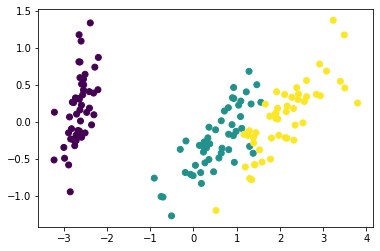

In [11]:
plt.scatter(X[:,0], X[:,1], c=y)

### 準備訓練/測試資料

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#輸出X, 輸入y
#80%訓練資料, 20%測試資料
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 0)

### Step01 開SVC函數學習機

In [14]:
from sklearn.svm import SVC

In [17]:
clf = SVC(gamma = "auto")

### Step02 訓練

In [18]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step03預測

In [19]:
y_predict = clf.predict(x_test)

In [20]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

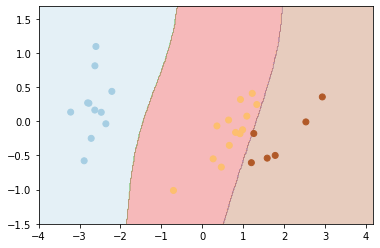

In [26]:
x0 = np.arange(-4, 4.2, 0.02)
y0 = np.arange(-1.5, 1.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
#拉平
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap="Paired")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap = "Paired")

# K-Means 自動分類 非監督式學習

In [27]:
#2維
x = np.random.rand(100, 2)

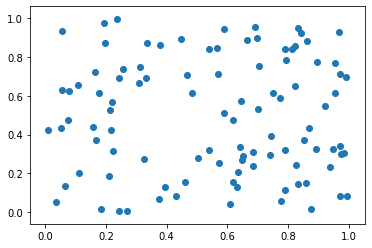

In [28]:
plt.scatter(x[:,0],x[:,1])

### Step01 打開一台K-means函數學習機

In [29]:
from sklearn.cluster import KMeans

In [30]:
#分成3類
clf = KMeans(n_clusters=3)

### Step02 學習

In [31]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Step03 預測

In [32]:
clf.predict(x)

array([2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0], dtype=int32)

In [33]:
#答案會一樣 因為是同個分類法
clf.labels_

array([2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0], dtype=int32)

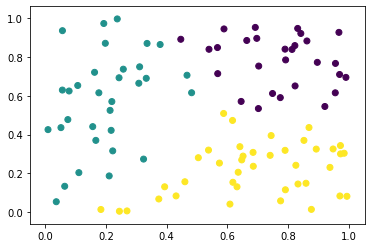

In [34]:
plt.scatter(x[:,0],x[:,1], c=clf.labels_)

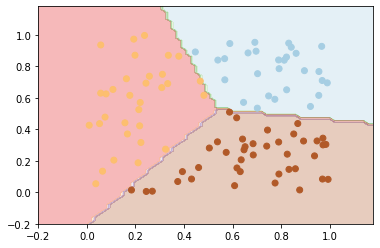

In [35]:
x0 = np.arange(-0.2, 1.2, 0.02)
y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap="Paired")
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap="Paired")

## `make_blobs`生更像真實世界的數據

In [38]:
from sklearn.datasets.samples_generator import make_blobs

In [39]:
#500筆資料, 3類, 2維
x, y = make_blobs(n_samples=500, centers=3,
                 n_features=2,
                 random_state=0)

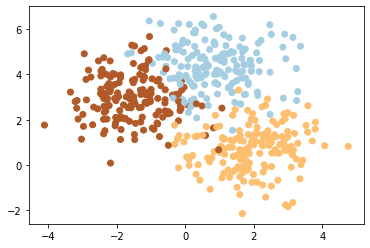

In [40]:
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired")

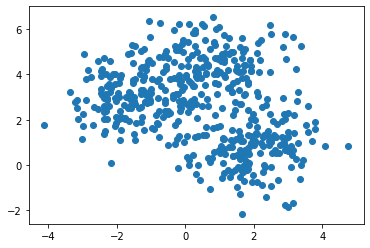

In [41]:
plt.scatter(x[:,0], x[:,1])

### Step01 打開K-Means函數學習機

In [42]:
#分3類
clf = KMeans(n_clusters=3)

### Step02 訓練

In [43]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Step03 預測

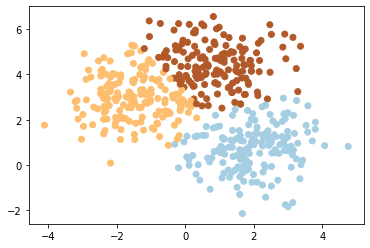

In [44]:
plt.scatter(x[:, 0], x[:, 1], c=clf.labels_, cmap="Paired")

# `Mean Shft` 連分幾類都不用說

### Step01 打開函數學習機

In [45]:
from sklearn.cluster import MeanShift

In [59]:
# bandwidth 分的嚴不嚴謹(可以不放)
# clf = MeanShift(bandwidth=1)
clf = MeanShift()

### Step02 訓練

In [60]:
clf.fit(x)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

### Step03 預測

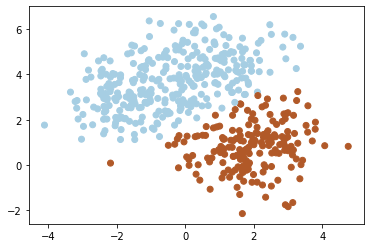

In [61]:
plt.scatter(x[:,0], x[:, 1], c=clf.labels_, cmap="Paired")

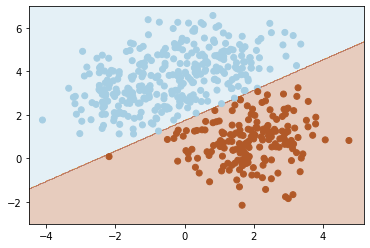

In [62]:
x0 = np.arange(-4.5, 5.2, 0.02)
y0 = np.arange(-3, 7, 0.02)

xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z, alpha = 0.3, cmap="Paired")
plt.scatter(x[:, 0], x[:, 1], c=clf.labels_, cmap="Paired")

# `cross_val_score` 評分不同方法的好壞

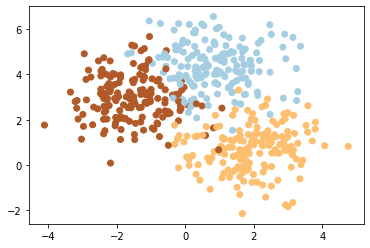

In [63]:
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired")

In [64]:
from sklearn.model_selection import cross_val_score

## SVC

In [65]:
from sklearn.svm import SVC

In [66]:
clf = SVC(gamma="auto")

In [67]:
#跑5次
scroes = cross_val_score(clf, x, y, cv=5)

In [68]:
scroes

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [69]:
scroes.max()

0.98989898989899

In [70]:
scroes.mean()

0.9420106716554008

## Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
clf = DecisionTreeClassifier()

In [73]:
scroes = cross_val_score(clf, x, y, cv=5)

In [74]:
scroes

array([0.92156863, 0.89108911, 0.94949495, 0.91919192, 0.87878788])

In [75]:
scroes.max()

0.9494949494949495

In [76]:
scroes.mean()

0.9120264967673238

# Bias-Variance Tradeoff誤差
`Bias` 訓練資料的誤差 overfitting

`Variance` 測試資料的誤差

# 總體學習 利用不只一個model訓練後 加權
`Bagging` 袋裝 將資料分成小袋小袋資料訓練

`Boosting` 激增 做錯的加大權重練習

# Random Forest 總體學習的一種方法

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
#100棵Decision Tree
clf = RandomForestClassifier(n_estimators=100)

In [79]:
scroes = cross_val_score(clf, x, y, cv=5)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [80]:
scroes

array([0.91176471, 0.91089109, 0.97979798, 0.87878788, 0.91919192])

In [81]:
scroes.max()

0.9797979797979798

In [82]:
scroes.mean()

0.9200867145538083